In [38]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [39]:
credit_risk = pd.read_csv(r"C:\Users\harsh\Downloads\credit_risk_dataset.csv")
credit_risk.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [40]:
credit_risk.shape

(32581, 12)

In [41]:
credit_risk.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [42]:
credit_risk_copy=credit_risk.copy()

In [43]:
#credit_risk.pivot_table(index='person_age',columns='loan_status',values='person_income',aggfunc='count').reset_index().sort_values(by='person_age',ascending = False)

In [44]:
cr_age_remove = credit_risk[credit_risk['person_age']<=70]

In [45]:
cr_age_remove.shape

(32568, 12)

Assumed the individual age of employment is between 25 to 65,total no. of years in service =47(To remove Outliers)

In [73]:
cr_emp_lenght_remove= cr_age_remove[cr_age_remove['person_emp_length']<=47]

In [48]:
cr_emp_lenght_remove.describe()
# Data is more relevant after age and employment lenght filter

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31671.000000,3.167100e+04,31671.000000,31671.000000,28626.000000,31671.000000,31671.000000,31671.000000
mean,27.717754,6.649231e+04,4.780714,9660.637492,11.040070,0.215497,0.169621,5.804395
std,6.159859,5.277413e+04,4.028718,6334.716643,3.229507,0.411173,0.106275,4.048776
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.936600e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,70.000000,2.039784e+06,38.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [49]:
cr_emp_lenght_remove.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3045
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [50]:
cr_afterfilter = cr_emp_lenght_remove.copy()

In [51]:
Assume_intrest = cr_afterfilter['loan_int_rate'].median()

Assumed int rate is median. Used to remove nan Vaule 

In [74]:
cr_afterfilter['loan_int_rate'] =cr_afterfilter['loan_int_rate'].fillna(Assume_intrest)

In [75]:
# No Nan value check
cr_afterfilter.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

Reset index after removing the first row (outliers/NaN values),
so the DataFrame index starts from 0 again.

In [54]:
cr_afterfilter.reset_index(drop=True)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
31666,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
31667,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
31668,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
31669,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [55]:
cr_df=cr_afterfilter.copy()

In [56]:
cr_df=cr_df.reset_index(drop=True)

In [57]:
person_home_ownership = pd.get_dummies(cr_df['person_home_ownership'],drop_first= True).astype(int).reset_index(drop=True)
loan_intent = pd.get_dummies(cr_df['loan_intent'],drop_first= True).astype(int).reset_index(drop=True)
cr_df['cb_person_default_on_file']=np.where(cr_df['cb_person_default_on_file']=='Y',1,0)

In [58]:
cr_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,0,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,0,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,0,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,1,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
31666,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,0,30
31667,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,0,19
31668,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,0,28
31669,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,0,26


In [59]:
binary_df = pd.concat([cr_df, person_home_ownership, loan_intent,],axis=1)


In [60]:
binary_df=binary_df.drop(['person_home_ownership','loan_intent','loan_grade'],axis =1)

In [61]:
binary_df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,OTHER,OWN,RENT,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,21,9600,5.0,1000,11.14,0,0.10,0,2,0,1,0,1,0,0,0,0
1,25,9600,1.0,5500,12.87,1,0.57,0,3,0,0,0,0,0,1,0,0
2,23,65500,4.0,35000,15.23,1,0.53,0,2,0,0,1,0,0,1,0,0
3,24,54400,8.0,35000,14.27,1,0.55,1,4,0,0,1,0,0,1,0,0
4,21,9900,2.0,2500,7.14,1,0.25,0,2,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31666,57,53000,1.0,5800,13.16,0,0.11,0,30,0,0,0,0,0,0,1,0
31667,54,120000,4.0,17625,7.49,0,0.15,0,19,0,0,0,0,0,0,1,0
31668,65,76000,3.0,35000,10.99,1,0.46,0,28,0,0,1,0,1,0,0,0
31669,56,150000,5.0,15000,11.48,0,0.10,0,26,0,0,0,0,0,0,1,0


In [62]:
from sklearn.model_selection import train_test_split

X = binary_df.drop(columns=['loan_status'])
y = binary_df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Train default rate:", y_train.mean())
print("Test default rate :", y_test.mean())


Train default rate: 0.21548107717984574
Test default rate : 0.21553357187960429


In [63]:
from sklearn.preprocessing import StandardScaler

num_cols = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length'
]

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
logit_model = LogisticRegression()

In [65]:
logit_model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [66]:
pd_train = logit_model.predict_proba(X_train)[:, 1]
pd_test  = logit_model.predict_proba(X_test)[:, 1]

In [67]:
from sklearn.metrics import roc_auc_score
from scipy.stats import ks_2samp

auc = roc_auc_score(y_test, pd_test)
gini = 2 * auc - 1

ks = ks_2samp(
    pd_test[y_test == 0],
    pd_test[y_test == 1]
).statistic

print("ROC AUC:", round(auc, 3))
print("Gini   :", round(gini, 3))
print("KS     :", round(ks, 3))


ROC AUC: 0.851
Gini   : 0.702
KS     : 0.544


In [68]:
coef_df = pd.DataFrame({
    'feature': X_train.columns,'coefficient': logit_model.coef_[0]}).sort_values(by='coefficient')

coef_df.head(10), coef_df.tail(10)


(                       feature  coefficient
 9                          OWN    -1.668990
 15                     VENTURE    -1.000945
 11                   EDUCATION    -0.786960
 14                    PERSONAL    -0.574561
 3                    loan_amnt    -0.562392
 13                     MEDICAL    -0.096546
 2            person_emp_length    -0.055397
 7   cb_person_cred_hist_length    -0.044352
 0                   person_age     0.019206
 1                person_income     0.089113,
                        feature  coefficient
 2            person_emp_length    -0.055397
 7   cb_person_cred_hist_length    -0.044352
 0                   person_age     0.019206
 1                person_income     0.089113
 12             HOMEIMPROVEMENT     0.104513
 6    cb_person_default_on_file     0.224794
 8                        OTHER     0.412561
 10                        RENT     0.732955
 4                loan_int_rate     0.940956
 5          loan_percent_income     1.323173)

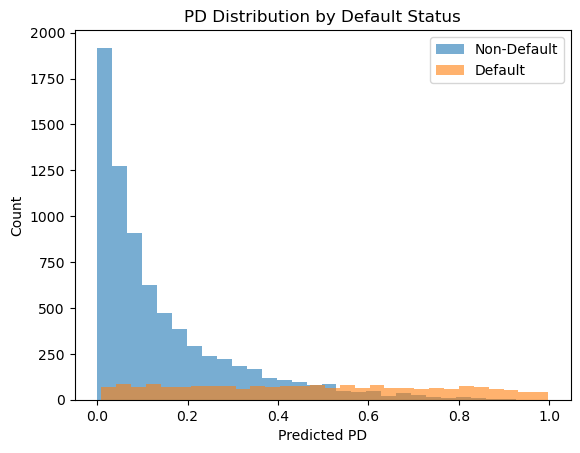

In [69]:
import matplotlib.pyplot as plt

plt.hist(pd_test[y_test == 0], bins=30, alpha=0.6, label='Non-Default')
plt.hist(pd_test[y_test == 1], bins=30, alpha=0.6, label='Default')
plt.xlabel("Predicted PD")
plt.ylabel("Count")
plt.legend()
plt.title("PD Distribution by Default Status")
plt.show()


# Scoring of application based on model to Accept or Reject loan based on pd 

In [70]:
def score_borrower(borrower_dict, model, scaler, feature_columns):
    import pandas as pd
    import numpy as np

    borrower = pd.DataFrame([borrower_dict])
    borrower = borrower.reindex(columns=feature_columns, fill_value=0)

    num_cols = [
        'person_age',
        'person_income',
        'person_emp_length',
        'loan_amnt',
        'loan_int_rate',
        'loan_percent_income',
        'cb_person_cred_hist_length'
    ]

    borrower[num_cols] = scaler.transform(borrower[num_cols])

    pd_value = model.predict_proba(borrower)[:, 1][0]

    if pd_value < 0.10:
        decision = "Approve – Low Risk"
    elif pd_value < 0.25:
        decision = "Approve – Standard Pricing"
    elif pd_value < 0.35:
        decision = "Approve – High Risk Pricing / Lower Amount"
    else:
        decision = "Reject or Require Collateral"

    contributions = borrower.values[0] * model.coef_[0]

    explanation = (
        pd.DataFrame({
            'feature': feature_columns,
            'contribution': contributions
        })
        .sort_values(by='contribution', ascending=False)
    )

    return pd_value, decision, explanation


Sample Data to check probability of default and soring based on model 

In [71]:
borrower_input = {
    'person_age': 32,
    'person_income': 600000,
    'person_emp_length': 6,
    'loan_amnt': 300000,
    'loan_int_rate': 14,
    'loan_percent_income': 0.35,
    'cb_person_cred_hist_length': 7,
    'OWN': 0,
    'RENT': 1,
    'OTHER': 0,
    'EDUCATION': 0,
    'MEDICAL': 0,
    'PERSONAL': 1,
    'VENTURE': 0,
    'HOMEIMPROVEMENT': 0,
    'cb_person_default_on_file': 0
}


In [72]:
pd_value, decision, explanation = score_borrower(
    borrower_input,
    logit_model,
    scaler,
    X_train.columns
)

print("Probability of Default:", round(pd_value, 3))
print("Decision:", decision)

explanation.head(10)


Probability of Default: 0.0
Decision: Approve – Low Risk


,feature,contribution
5,loan_percent_income,2.252496
1,person_income,0.920752
4,loan_int_rate,0.906482
10,RENT,0.732955
0,person_age,0.013389
6,cb_person_default_on_file,0.000000
8,OTHER,0.000000
9,OWN,-0.000000
11,EDUCATION,-0.000000
12,HOMEIMPROVEMENT,0.000000
